In [1]:
!pip install networkx
!pip install pyvis
!pip install neo4j
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.5/293.5 kB 2.0 MB/s eta 0:00:00


In [6]:
import os
from google.colab import files
import pandas as pd

In [4]:
uploaded = files.upload()

Saving Neo4j_HeadRelationTail_125-150.csv to Neo4j_HeadRelationTail_125-150.csv


In [16]:
triplet= pd.read_csv('Neo4j_HeadRelationTail_125-150.csv')

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase

In [17]:
triplets = []
for index, row in triplet.iterrows():
    head = row['n']
    relation_type = row['r']
    tail = row['m']
    triplets.append({'head': head, 'type': relation_type, 'tail': tail})

In [8]:
from neo4j import GraphDatabase

In [19]:
uri = "neo4j+s://6b479450.databases.neo4j.io"  # Replace with your Neo4j instance URI
username = "neo4j"
password = "a-kw5fZ6cRB0oe66mDO5JRrRZ1ynC1ym-IeokE1qq0o"  # Replace with your Neo4j password
driver = GraphDatabase.driver(uri, auth=(username,password))

In [20]:
def create_nodes_and_relationships(tx, head, type_, tail):
    query = (
        "MERGE (a:head {name: $head}) "
        "MERGE (b: tail {name: $tail}) "
        "MERGE (a)-[r : Relation {type: $type}]->(b)"
    )
    tx.run(query, head=head, type=type_, tail=tail)

In [21]:
def get_graph_data(tx):
    query = "MATCH (n)-[r]->(m) RETURN n.name AS head, r.type AS type, m.name AS tail"
    result = tx.run(query)
    return [(record["head"], record["type"], record["tail"]) for record in result]

In [23]:
with driver.session() as session:
    for row in triplets:
        session.write_transaction(create_nodes_and_relationships, row['head'], row['type'], row['tail'])

print("Knowledge graph created successfully!")

driver.close()

<ipython-input-23-e88334ab5849>:3: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(create_nodes_and_relationships, row['head'], row['type'], row['tail'])


Knowledge graph created successfully!


In [24]:
G = nx.DiGraph()

In [29]:
for data in triplets:
    G.add_edge(data['head'], data['tail'], label=data['type'])

In [30]:
pos = nx.spring_layout(G)  # positions for all nodes
labels = nx.get_edge_attributes(G, 'label')

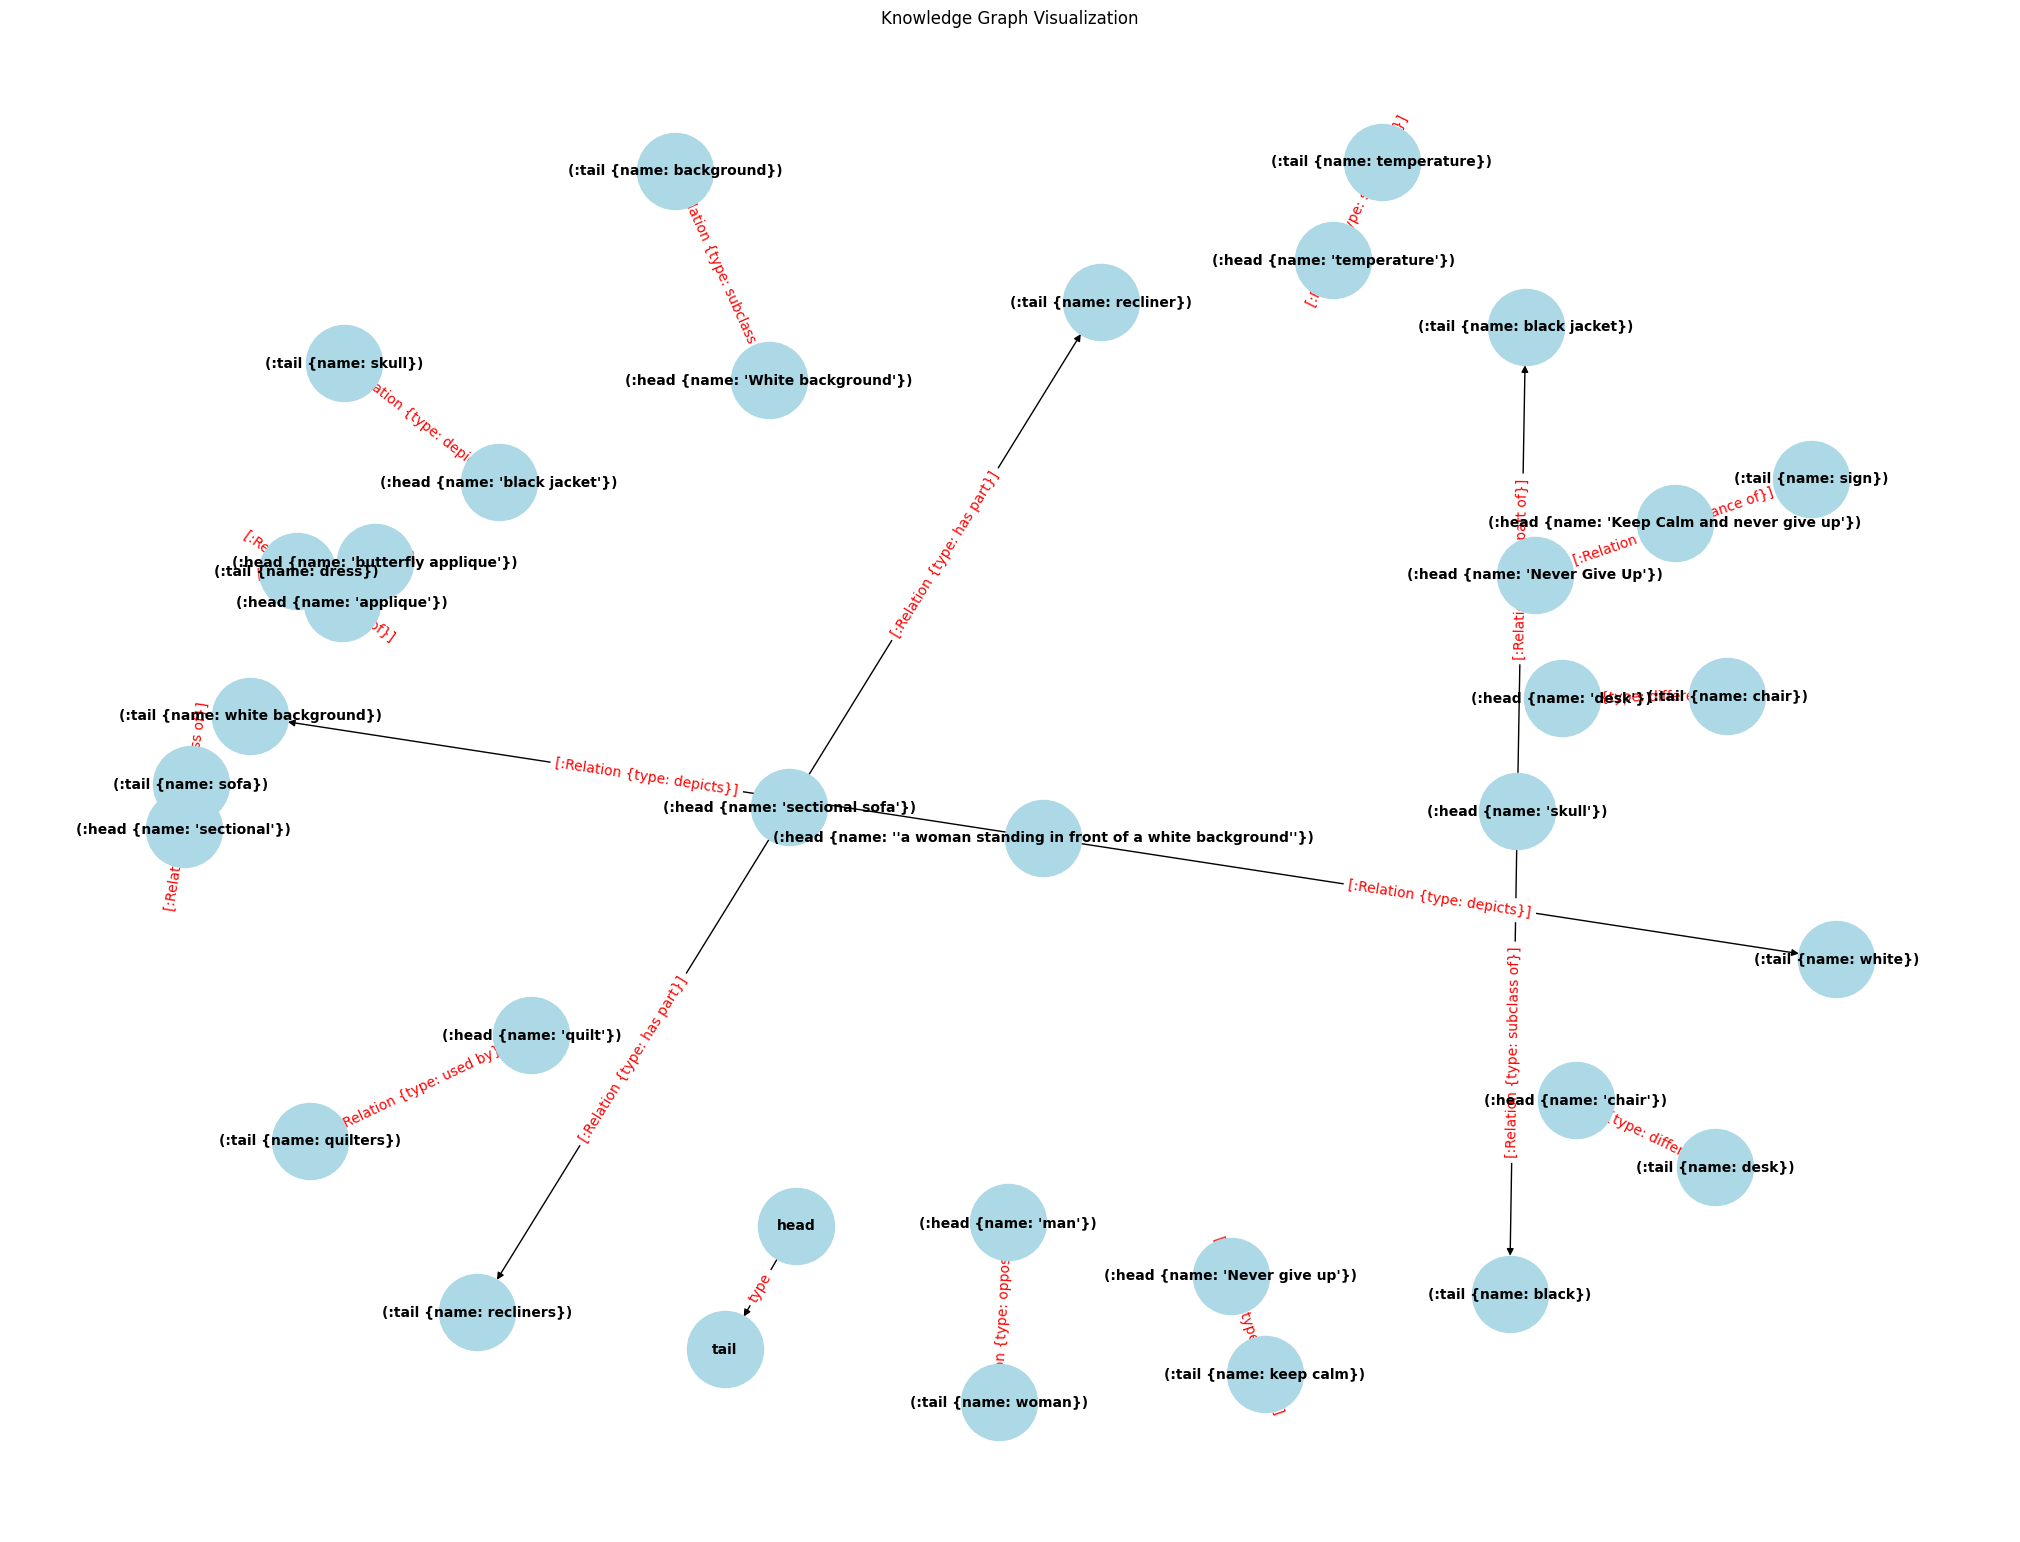

In [31]:
plt.figure(figsize=(20, 15))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')

plt.title('Knowledge Graph Visualization')
plt.show()